In [1]:
# import NLTK (Natural Language Toolkit), a Python library for examining english text
# use tokenize package to split at punctuation other than periods and white space
# remove stop words from text, which are commonly used words which won't help us derive meaning/value from analysis
import nltk
#nltk.download('punkt')
# split into words
import nltk.tokenize 
from nltk import word_tokenize
from nltk.corpus import stopwords

In [3]:
# Read the text files 
filename = 'KAA-FocusGroup_transcription.txt'
file = open(filename, 'rt')
text_kaa_fg = file.read()
file.close()
transcripts = [text_kaa_fg]
text_banks = " ".join(transcripts)

In [4]:
#print(text_banks)

In [5]:
tokens = word_tokenize(text_banks)

In [6]:
#print(tokens)

In [7]:
# lowercase all words because default_stopwords are lowercase too
words = [word.lower() for word in tokens]

In [8]:
#print(words)

In [9]:
# remove from tokens any unwanted characters and punctuation
words = [x for x in words if len(x) >2]


In [24]:
#print(words)

In [25]:
# remove numbers
words = [w for w in words if not w.isnumeric()]


In [26]:
# create variable for NLTK stopwords
stopwords_eng = set(nltk.corpus.stopwords.words('english'))


In [27]:
# remove stopwords
words = [word for word in words if word not in stopwords_eng]


In [31]:
#print(words)

In [32]:
# remove names, terms that show up in a transcript that aren't useful for analysis
terms = ['operator','mark',"'ve","n't", "'re",'quarter', 'would',"'ll",
         'see','fourth','like','say','look','going','question', 'one','saw','much','lot','said', 'got','right',
         'slide','bit','put','transcript','inc.','copyright','yes','pretty','january','thank','want','give',
         'morning','alse','get','year','billion','million','thing', 'really','back','talked','think','well','morning',
         'good','year-over-year', 'given', 'still','kind', 'things','also','actually','way','sort','looking','could',
         'betsy','graseck','see','last','little','first', 'make','yeah', 'example','know', 'maybe', 'okay', 'know', 
         'let', 'within', 'great', 'done','something', 'mean', 'new','\'ll', 'definitely','example', 'use', 'even', 
         'add', 'please','wanted', 'name', 'different', 'list', 'may', 'point', 'whether', 'many', 'main', 'key', 
         'everything','sure', 'part', 'since']
       

In [34]:
# remove other terms
words = [word for word in words if word not in terms]  

In [38]:
#print(words)

In [39]:
# let's combine revenues and revenue to just revenue, rates --> rate. 
# Done manually bec nltk Stemming was not helpful
words = list(map(lambda word: word.replace('rooms', 'room'),words))
words = list(map(lambda word: word.replace('rates', 'rate'),words))

In [41]:
#print(words)

In [43]:
# Check top words so far
# Calculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 10 words
for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

accreditation;44
website;43
data;40
process;31
institutions;26
institution;22
program;22
information;21
programs;21
agency;20


In [44]:
#import wordcloud and matplotlib for chart
#from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)

In [53]:
# create string of words list so that WordCloud can be created
words_string = " ".join(str(x) for x in words)



In [55]:
# remove any other stopwords we might have missed
other_stopwords = set(stopwords_eng)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")



NameError: name 'WordCloud' is not defined

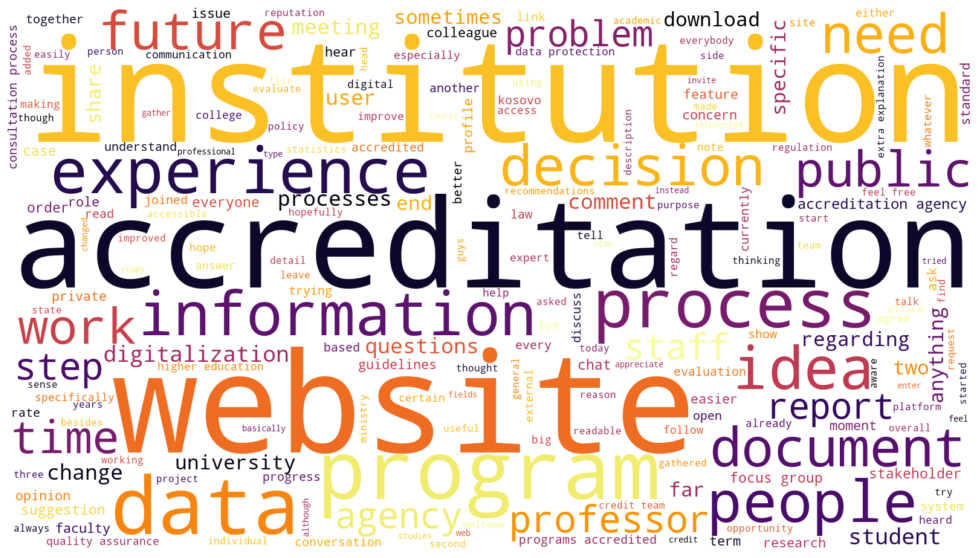

In [17]:
#Larger view, and save into jpg file
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('banks1.jpg', format='jpg', dpi=600)



In [48]:
# Batch number 2 of terms to remove. Focusing on expected terms in an earnings call
more_terms = ['started','growth','grew','business','lower','banking','know','first','obviously','new','income','earnings',
             'mentioned','revenue','market','investment','expense','maybe','little','strong','credit','take','next',
             'continue','continued', 'time','loan','rate','client','deposit', 'driven','year','end',
             'higher', 'impact','expect','number','full','better','okay','remain','feel','december', 'markets','net',
              'years','investments','line','cost','costs','long','short','term','terms', 'seen','result','results',
             'come','share','across','seeing','businesses','basis','point','one','some','level','benefit','total',
              'tax','yearoveryear', 'monday','roughly','take','always','including','something','environment',"'ll"]
words_edit = [word for word in words if word not in more_terms]

In [50]:
# create string of words list so that WordCloud can be created
words_string_edit = " ".join(str(x) for x in words_edit)

In [51]:
# remove any other stopwords we might have missed
other_stopwords = set(STOPWORDS)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string_edit)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

NameError: name 'STOPWORDS' is not defined

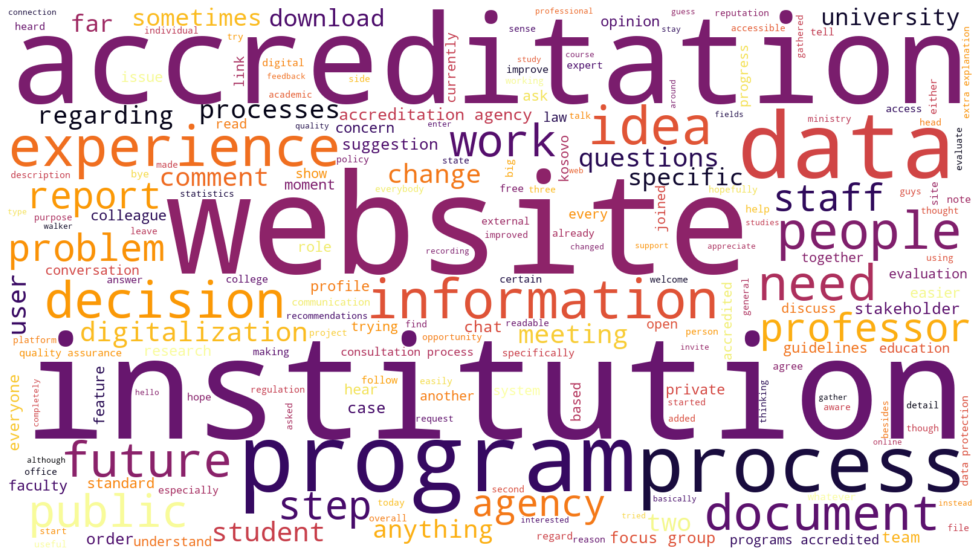

In [22]:
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('banks2.jpg', format='jpg', dpi=600)

In [23]:
# use concordance to show the occurrence of a given word, together with some context
# first create a text object
text_obj = nltk.Text(tokens)

In [24]:
# try some terms to see how they are used in a given context
text_obj.concordance('accreditation')

Displaying 25 of 44 matches:
 us to use in order to apply for accreditation re-accreditation process . Okay 
 and then of course , I know the accreditation office is trying to put the sche
 . I mean , I 've been following accreditation agency from its inception and it
eneral information about aka the accreditation process , the decision-making , 
er than those interested to read accreditation decisions . So also , we have no
ask specific questions about the accreditation system . Okay . I appreciate you
on the website and then also the accreditation system . Are there any other oh 
holders of this process , of the accreditation process . Because we wanted to g
 . Again , we will ask about the accreditation site , but please , we 're inter
t about about my experience with accreditation agency . But finally , we 'll di
. A lot of regulation during the accreditation process for program or for insti
s for program or for institution accreditation as well . Digitalization will he
ting , onli

In [25]:
text_obj.concordance('digitalization')



Displaying 11 of 11 matches:
kets of this of this meeting is digitalization . And I think that it was quite
vo , occupation agency and also digitalization has as improved . And especiall
n agency . But finally , we 'll digitalization . I think other job at will be 
itution accreditation as well . Digitalization will help us to use the spendin
de a good communication through digitalization in terms of reducing the spendi
t 's a pretty huge work done in digitalization . As I said , we need some deta
out your overall opinion of the digitalization process so far . And then we ca
since you 're starting with the digitalization technologies , great , but it '
as . Again , thinking about the digitalization process and making , making lif
ficult , I think is the goal of digitalization . So if you think of it that wa
b , say the accreditation , the digitalization process itself . And we 're , w


In [26]:
text_obj.concordance('parent')

no matches


In [27]:
text_obj.concordance('student')

Displaying 4 of 4 matches:
ormation which can be useful to the student that is trying to register . On top
for up for certain programs and the student will not know which programs are ac
 limited because it only shows like student number . I do n't that 's still ver
terested in the person you , from a student perspective had navigated this and 


In [28]:
text_obj.concordance('institutions')

Displaying 25 of 26 matches:
 to gather data to see how other institutions are doing so we can chop , tried
e , put have readable data about institutions and they 're accredited programs
nt to have an overview about how institutions are improving . Now we have guid
g . Now we have guidelines where institutions are rated , Let 's say a standar
re inconsistencies sometimes how institutions are rated , but to improve the p
istency across evaluation in all institutions . As far as the team is concerne
ities and other higher education institutions , be aware of what 's happening 
e reputation of higher education institutions . This may be also should be loo
 monitored by other , also other institutions and not have a reputation like w
ession that our higher education institutions are cheating or doing something 
at a problem , really , what the institutions are doing ? And then second is t
 on higher education categorizes institutions within those . So , and a lot of
divided government or o

In [29]:
text_obj.concordance('website')

Displaying 25 of 43 matches:
ll us about how you 've used the KA website and then how would you rate your ex
Okay . And have you checked the new website ? I did my research last night and 
you think would be useful for the K website ? Like certain reports or yeah , I 
ugh a credit team and put it in the website or just leave it at a AA credit Jim
 let 's say , sustainability of the website . And it has changed a lot , but th
ity , but also the usability of the website . We could have , for example , a s
u for that . But thinking about the website and I guess I should have said the 
e said the new iteration or the new website . So just some thoughts about your 
nk you for for your feedback on the website and then also the accreditation sys
fically , the new iteration of that website . And we wondered if you could tell
about my experience with , with our website because I saw that the pockets of t
hat you have interacted with KA the website . Again , we will ask about the acc
It 's neede